In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [52]:
import numpy as np
import pandas as pd
import zipfile
import geopandas as gp
import sklearn
import sklearn.cluster

import pylab as pl

# Make plots prettyful
pl.style.use('fivethirtyeight')

In [131]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
]

kelly_colors_hex_cmap = dict([(i,kelly_colors_hex[i]) for i in range(len(kelly_colors_hex))])

In [62]:
data = pd.read_csv('data.csv', index_col='ZIP').dropna()

In [64]:
matrix = data.as_matrix()

In [66]:
matrix.shape

(230, 20)

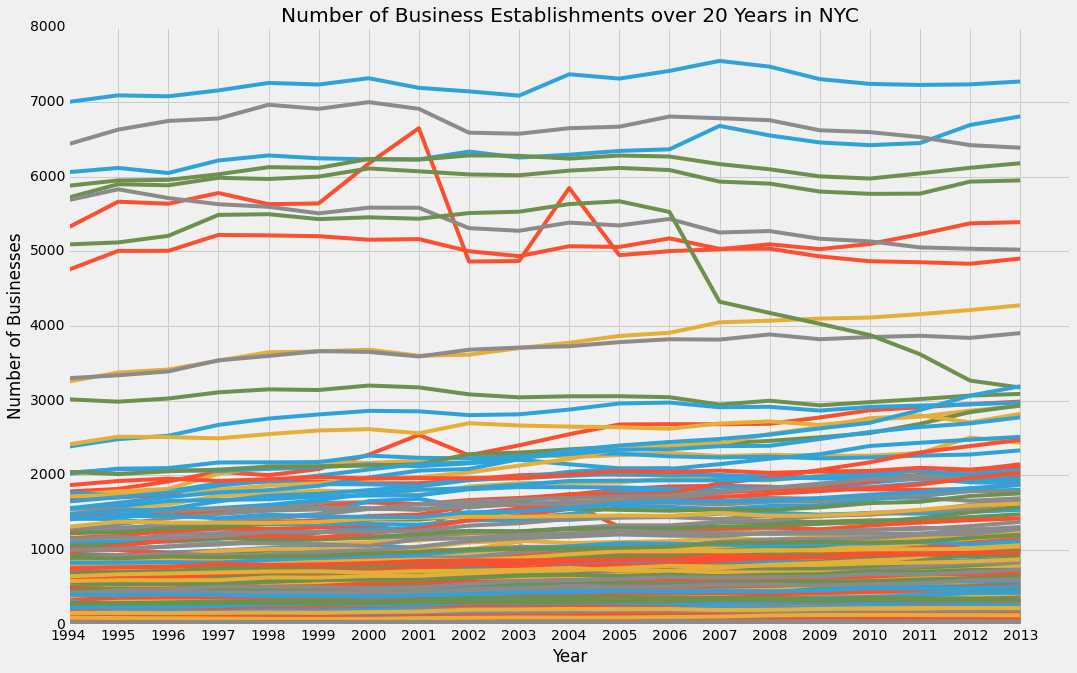

In [67]:
figure, ax = pl.subplots(figsize=(16,10))
ax.plot(matrix.transpose())
ax.set_title('Number of Business Establishments over 20 Years in NYC')
ax.set_xticks(np.arange(20))
ax.set_xticklabels(1994 + np.arange(20))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Businesses')

In [68]:
# Standardize Rows
matrix = matrix - matrix.mean(axis=1)[:,None]
matrix = matrix / matrix.std(axis=1)[:,None]

In [186]:
num_clusters = 6
res = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(matrix)

In [187]:
def plotClusters(clusters, labels):
    figure, ax = pl.subplots(figsize=(16,10))
    num_clusters = len(clusters)
    
    for i in range(num_clusters):
        ax.plot(matrix[labels == i].transpose(), color=kelly_colors_hex[i], alpha=.35)

    for i in range(num_clusters):
        ax.plot(clusters[i], color=kelly_colors_hex[i], linewidth=10, label='Cluster %s' % i)

    ax.set_xlim([0,19])
    ax.set_title('Number of Business Establishments over 20 Years in NYC Clustered')
    ax.set_xticks(np.arange(20))
    ax.set_xticklabels(1994 + np.arange(20))
    ax.set_xlabel('Year')
    ax.set_ylabel('Standardized Number of Businesses')
    ax.legend(ncol=2)

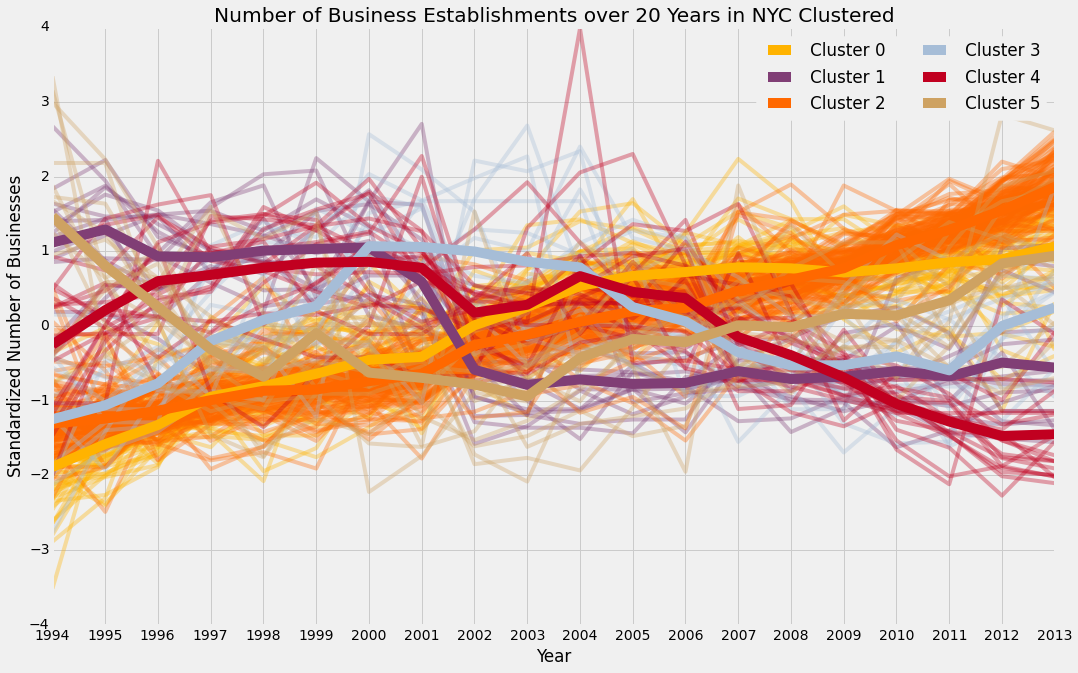

In [188]:
plotClusters(res.cluster_centers_, res.labels_)

In [189]:
def plotMap(labels):
    # Read in Zipcode geojson
    zips = gp.read_file('zips.geojson')
    zips['postalCode'] = zips['postalCode'].astype(int)
    
    # Setup label data to be merged
    data['label'] = labels
    data['ZIP'] = data.index
    
    # Merge
    merged = zips.merge(data, left_on='postalCode', right_on='ZIP')
    
    # Plot
    figure, ax = pl.subplots(figsize=(16,16))
    merged.plot(axes=ax, column='label', legend=True, categorical=True)
    ax.set_title('Number of Business Establishments over 20 Years in NYC Clustered')

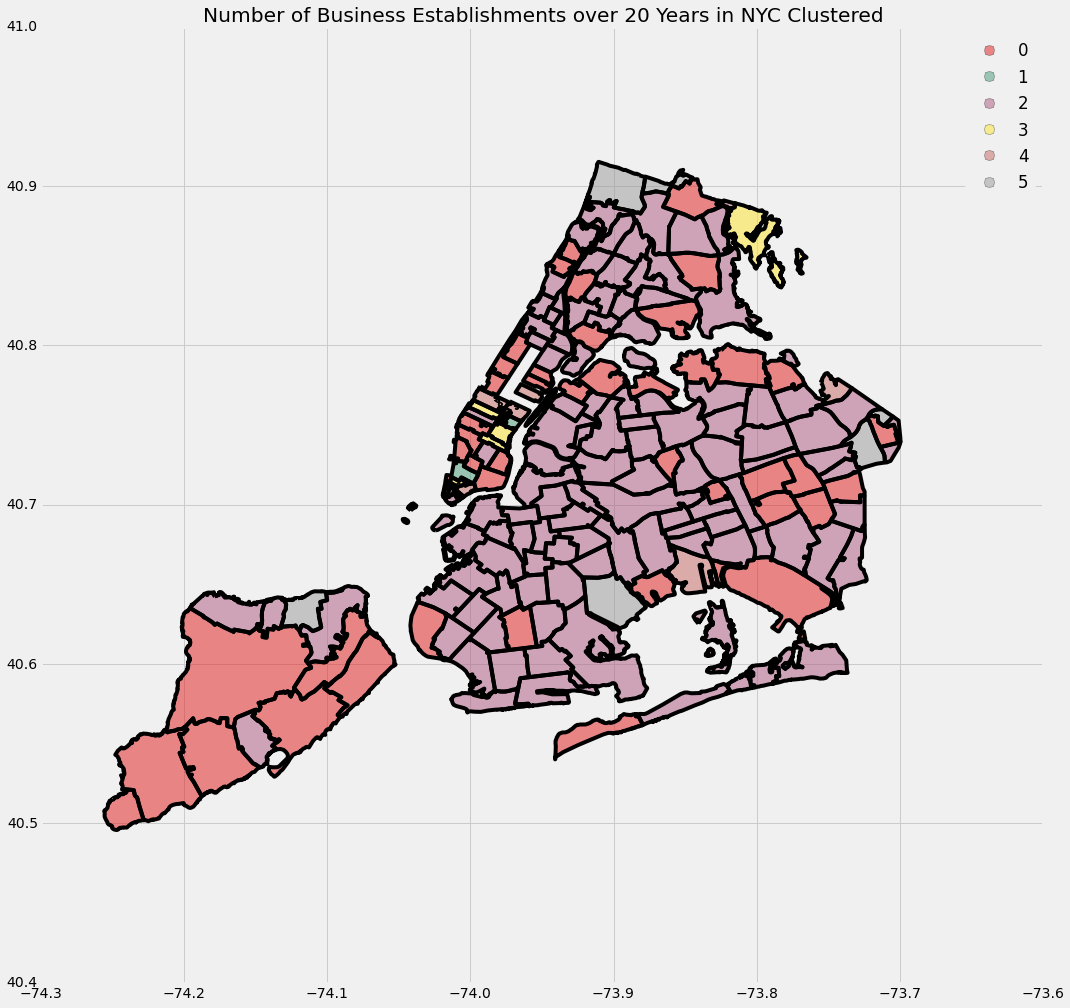

In [190]:
plotMap(res.labels_)

# Algorithm 2 - Affinity Propagation

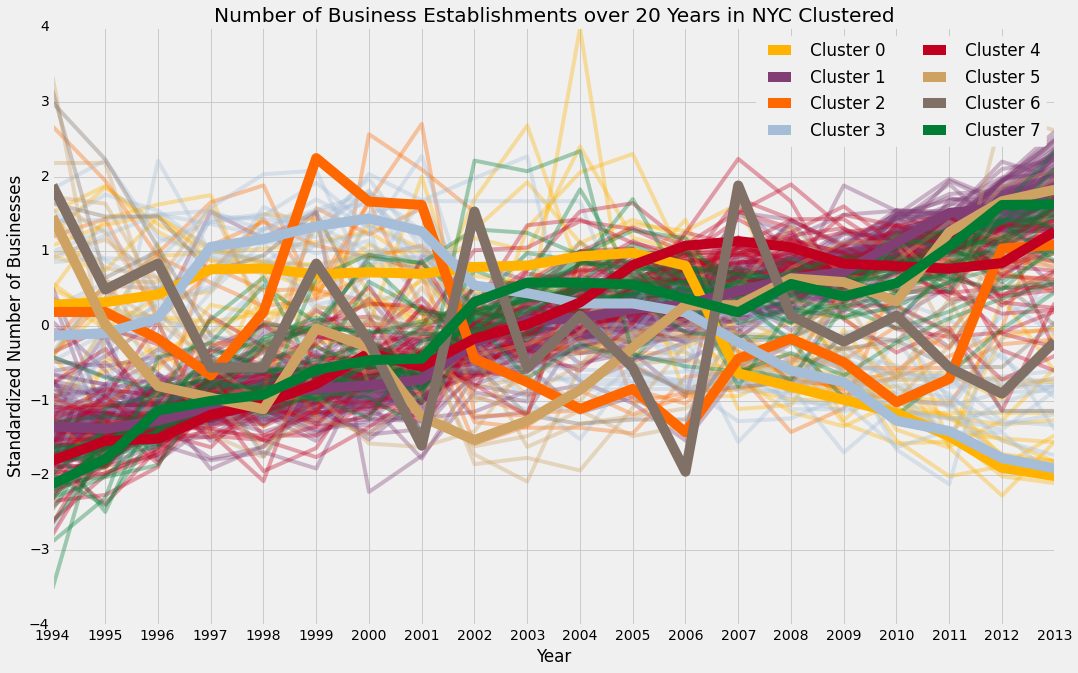

In [191]:
res = sklearn.cluster.AffinityPropagation(.999).fit(matrix)
plotClusters(res.cluster_centers_, res.labels_)

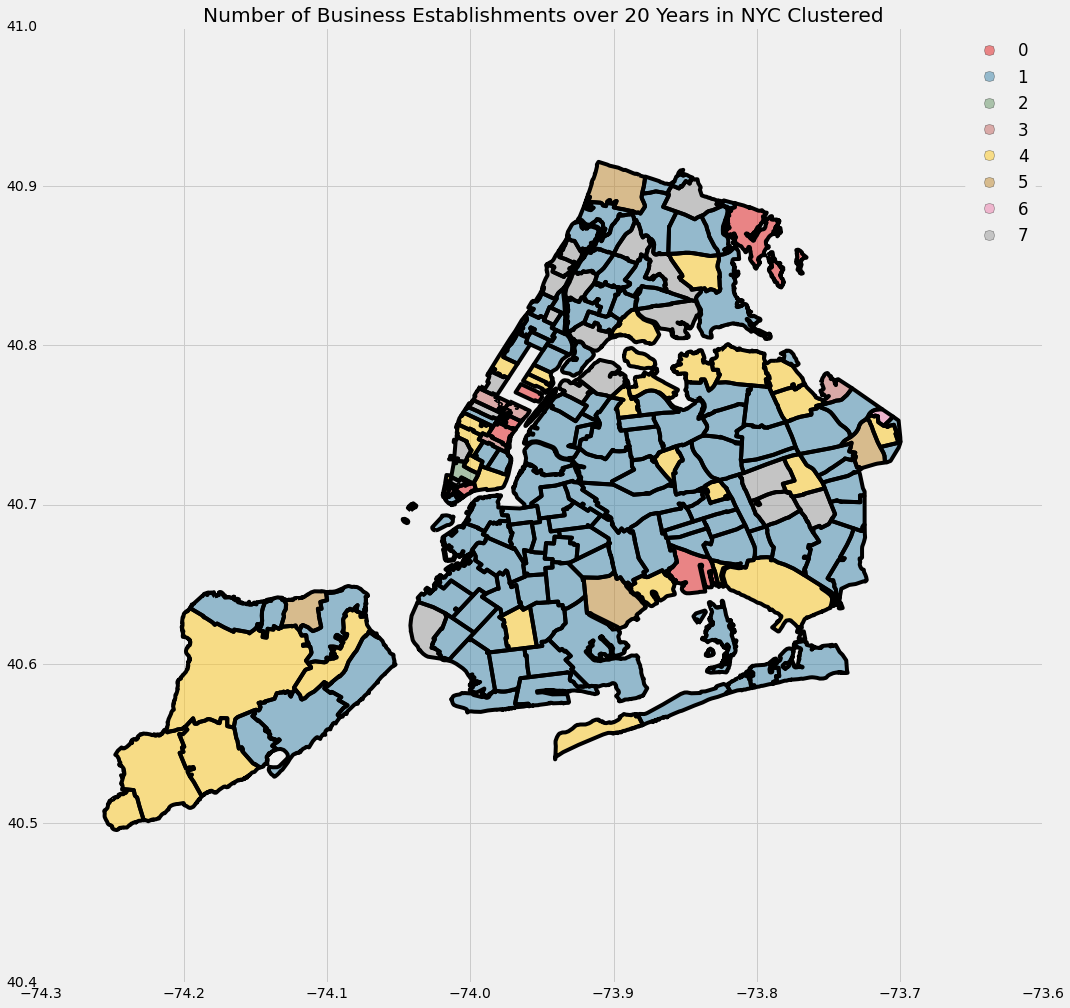

In [192]:
plotMap(res.labels_)

The two algorithms mostly agree.  Affinty Propagation ended on 8 clusters while I had K-Means fixed at 6, so there are some small differences in the details, but the large cluters mostly line up.

The biggest cluster(s), taking up most of the city, is trending up, which makes sense as the city as a whole attracts more business.

Both clusters picked out the time series which dropped off in 2001, which corresponds to where the World Trade Center is.

They also both pick out a part of midtown which has been dropping since the mid to late 2000s.  Possibly related to the financial crisis?